In [1]:
from src.slater_dl_wrapper.models import MultiLayerPerceptron
from src.slater_dl_wrapper.helpers import *
import torch

In [2]:
RANDOM_SEED = 1
BATCH_SIZE = 5
NUM_EPOCHS = 200
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cpu


In [3]:
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

train_size = 20

train_dataset = Subset(datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True), range(train_size))
valid_dataset = Subset(datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True), range(train_size, 1000 + train_size))

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f'Train: {len(train_dataset)}')
print(f'Valid: {len(valid_dataset)}')

Train: 20
Valid: 1000


Time	Epoch	Loss	Train	Valid
00:00	1	2.2335	20.00	11.60
00:00	2	2.1665	20.00	12.50
00:00	3	2.0876	35.00	15.40
00:00	4	1.9740	35.00	19.00
00:00	5	2.1414	35.00	19.60
00:00	6	1.9958	35.00	19.30
00:00	7	1.8180	35.00	20.30
00:00	8	2.3401	35.00	19.50
00:00	9	1.8019	35.00	20.30
00:00	10	1.2231	40.00	20.90
00:00	11	1.6414	55.00	24.80
00:00	12	0.6960	55.00	23.70
00:00	13	1.1486	65.00	30.50
00:00	14	1.6990	85.00	37.00
00:00	15	1.0980	90.00	41.70
00:00	16	1.0139	85.00	40.20
00:00	17	0.9166	90.00	45.90
00:00	18	0.7857	90.00	41.40
00:00	19	0.7332	95.00	45.30
00:00	20	0.2678	95.00	48.20
00:00	21	0.1929	100.00	52.00
00:00	22	0.3877	100.00	51.80
00:00	23	0.2279	100.00	50.70
00:00	24	0.0998	100.00	53.40
00:00	25	0.0921	100.00	52.80
00:00	26	0.1291	100.00	51.80
00:00	27	0.1339	100.00	53.20
00:00	28	0.0755	100.00	53.20
00:00	29	0.0288	100.00	53.50
00:00	30	0.0777	100.00	54.20
00:00	31	0.0530	100.00	54.40
00:00	32	0.0585	100.00	54.40
00:00	33	0.0532	100.00	55.30
00:00	34	0.0455	100.00	54.30
00:00	35	0.0359

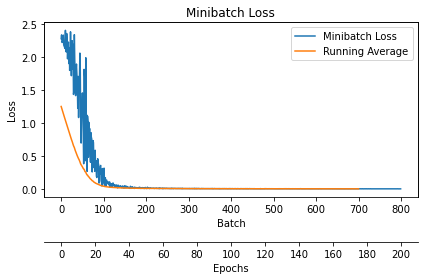

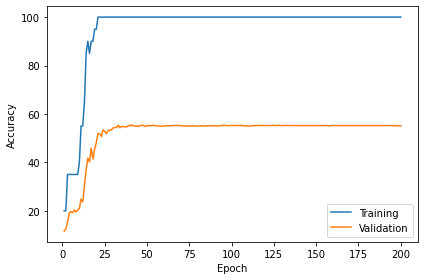

In [4]:
torch.manual_seed(RANDOM_SEED)
model = MultiLayerPerceptron(num_features=28**2, num_classes=10, hidden_sizes=[50, 20], activations='ReLU', flatten=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train(model,
                                                            NUM_EPOCHS,
                                                            train_loader,
                                                            valid_loader=valid_loader,
                                                            learning_rate=0.1,
                                                            device=DEVICE)

plot_training_loss(minibatch_loss_list, NUM_EPOCHS, len(train_dataset) // BATCH_SIZE, results_dir=None, averaging_iterations=100)
plot_accuracy(train_acc_list=train_acc_list, valid_acc_list=valid_acc_list, results_dir=None)